In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [2]:
#You should have them already downloaded in the data directory
try:
    #adding path for both local and server, only one of these will actually be used at a time
    nltk.data.path.append('/project2/macs60000/shared_data/nltk')
    nltk.data.path.append('../data')
    #Check that everything is in place
    nltk.corpus.gutenberg.fileids()
except LookupError:
    print("You have to download all the documents")
    print("Downloading to ../data this should only take a couple minutes")
    nltk.download('all', download_dir = '../data')
    nltk.data.path.append('../data')
#If you haven't downloaded the copura then you will have to run `nltk.download()`
print(nltk.corpus.gutenberg.fileids())
print(len(nltk.corpus.gutenberg.fileids()))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
18


In [3]:
nltk.corpus.gutenberg.raw('carroll-alice.txt')[2000:4000]

"k to see anything; then she\nlooked at the sides of the well, and noticed that they were filled with\ncupboards and book-shelves; here and there she saw maps and pictures\nhung upon pegs. She took down a jar from one of the shelves as\nshe passed; it was labelled 'ORANGE MARMALADE', but to her great\ndisappointment it was empty: she did not like to drop the jar for fear\nof killing somebody, so managed to put it into one of the cupboards as\nshe fell past it.\n\n'Well!' thought Alice to herself, 'after such a fall as this, I shall\nthink nothing of tumbling down stairs! How brave they'll all think me at\nhome! Why, I wouldn't say anything about it, even if I fell off the top\nof the house!' (Which was very likely true.)\n\nDown, down, down. Would the fall NEVER come to an end! 'I wonder how\nmany miles I've fallen by this time?' she said aloud. 'I must be getting\nsomewhere near the centre of the earth. Let me see: that would be four\nthousand miles down, I think--' (for, you see, Ali

In [4]:
print(nltk.corpus.gutenberg.words('carroll-alice.txt'))
print(nltk.corpus.gutenberg.sents('carroll-alice.txt'))

['[', 'Alice', "'", 's', 'Adventures', 'in', ...]
[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], ['CHAPTER', 'I', '.'], ...]


In [6]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('carroll-alice.txt'))
countedWords[:10]

,count,word
0,3,[
1,398,alice
2,1731,'
3,201,s
4,7,adventures
5,369,in
6,3,wonderland
7,59,by
8,1,lewis
9,1,carroll


In [9]:
words = [word.lower() for word in nltk.corpus.gutenberg.words('carroll-alice.txt')]
freq = nltk.FreqDist(words)
print (freq['curious'])

19


In [10]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,count,word
32,1993,","
2,1731,'
16,1642,the
33,872,and
14,764,.
22,729,to
55,632,a
48,595,it
41,553,she
13,543,i


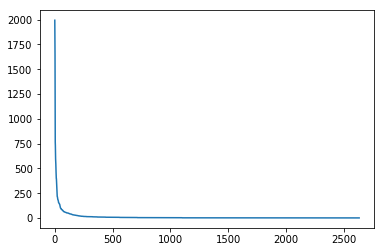

In [11]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

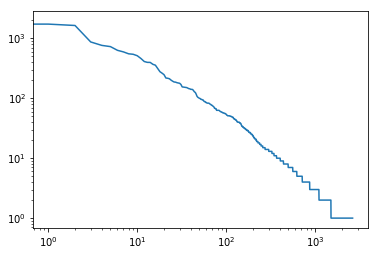

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [14]:
aliceIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('carroll-alice.txt'))

In [15]:
aliceIndex.print_concordance('curious')

Displaying 19 of 19 matches:
 * * * * * * * * * * * * ' What a curious feeling !' said Alice ; ' I must 
laying against herself , for this curious child was very fond of pretending
and an Eaglet , and several other curious creatures . Alice led the way , a
d yet -- and yet -- it ' s rather curious , you know , this sort of life ! 
 over their heads . She felt very curious to know what it was all about , a
n without a cat ! It ' s the most curious thing I ever saw in my life !' Sh
g right into it . ' That ' s very curious !' she thought . ' But everything
he thought . ' But everything ' s curious today . I think I may as well go 
m red . Alice thought this a very curious thing , and she went nearer to wa
thought she had never seen such a curious croquet - ground in her life ; it
t being seen , when she noticed a curious appearance in the air : it puzzle
 the next , and so on .' ' What a curious plan !' exclaimed Alice . ' That 
at last : ' and I do so like that curious song about the wh